In [234]:
from tahoe import execute_async
import pandas as pd
import json
from tqdm import tqdm
from copy import deepcopy

In [163]:
execute_async("""SELECT COUNT(*) FROM sweeper.attribute_extraction_events WHERE action=4""")

[(19633,)]

In [164]:
res = execute_async("""SELECT task_id, extraction_result, dt, hr FROM sweeper.attribute_extraction_events WHERE action=4""")

In [165]:
df = pd.DataFrame(res)

In [166]:
df.columns = ['task_id', 'extraction_result', 'dt', 'hr']

In [167]:
df

,task_id,extraction_result,dt,hr
0,product_attribution_md_9f6e8af6d28cdd83c883abe...,"{""Age Range Description"": [""Not Sure""], ""Use"":...",2023-03-31,10
1,product_attribution_md_5fbd99b0ce8ba9e11db9edf...,"{""Age Range Description"": [""Not Sure""], ""Use"":...",2023-03-31,10
2,product_attribution_md_898e222099eb81d369d7d01...,"{""Item Weight (Include Unit of Measure)"": [""No...",2023-03-31,10
3,product_attribution_md_fac5f33920b9094baaf6ea3...,"{""Age Range Description"": [""Kids"", ""Adult"", ""T...",2023-03-31,10
4,product_attribution_md_1d2060a2ae54b459ca1f507...,"{""Age Range Description"": [""Not Sure""], ""Use"":...",2023-03-31,10
...,...,...,...,...
19628,product_attribution_md_977a5bdc6098376fc7df8c7...,"{""Primary Color"": [""Black""], ""Alpha Size"": [""N...",2023-03-30,11
19629,product_attribution_md_22c8cf827ea1bdd0b82dd21...,"{""Pattern"": [""Not Sure""], ""Primary Color"": [""N...",2023-03-30,11
19630,product_attribution_md_d17808cf878f5d0f3a71cce...,"{""Primary Color"": [""Not Sure""], ""Certification...",2023-03-30,11
19631,product_attribution_md_792e1fb4b63b179f85ccf0e...,"{""Primary Color"": [""Not Sure""], ""Alpha Size"": ...",2023-03-30,11


In [168]:
df_orig = pd.read_json('input/product_attr_extract_md_03252023.json', lines=True)

In [169]:
len(df_orig)

26066

In [170]:
df_merge = df_orig.merge(df, on='task_id', how='inner')

In [171]:
len(df_merge), len(set(df_merge.task_id))

(18635, 18633)

In [192]:
len(set(df_merge.category_path))

684

<Axes: ylabel='category_path'>

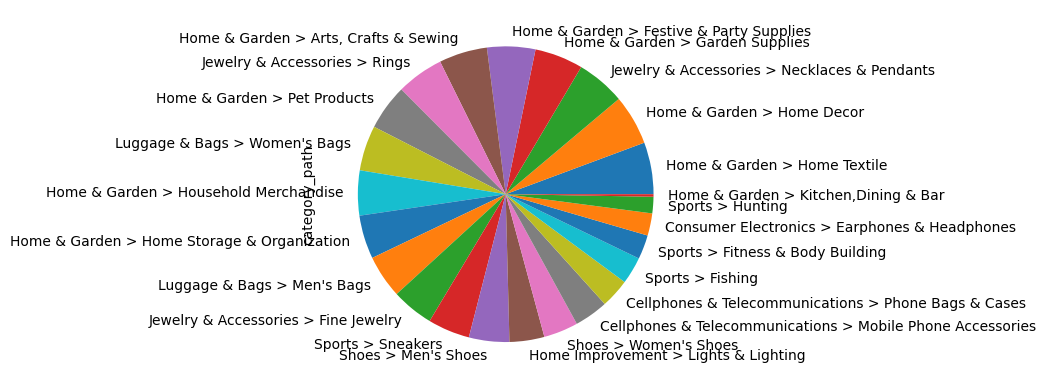

In [172]:
df_merge.category_path.apply(lambda x: ' > '.join(x.split(' > ')[:2])).value_counts().plot.pie()

In [230]:
df_merge_sample = df_merge.sample(10)

In [240]:
def clean_human_result_return(d_):
    try:
        d = deepcopy(d_)
        for k in d:
            if len(d[k]) > 0 and d[k][0].strip().lower() == 'not sure':
                d[k] = []
        return d
    except Exception as e:
        print(d, e)

In [247]:
from copy import deepcopy
import hashlib
from collections import OrderedDict
import json
def sortOD(od):
    res = OrderedDict()
    for k, v in sorted(od.items()):
        if isinstance(v, dict):
            res[k] = sortOD(v)
        else:
            res[k] = deepcopy(v)
    return res

In [245]:
df_merge_sample['preloading_result'] = df_merge_sample['extraction_result'].apply(lambda x: json.dumps(clean_human_result_return(json.loads(x))))

In [246]:
df_merge_sample['task_id'] = df_merge_sample['task_id'].apply(lambda x: )

,product_id,category_id,category_path,title,product_description,main_image_url,text,attribute_config,task_id,preloading_result,extraction_result,dt,hr
17842,60c7d3928ea1ce4983316d3c,2638,Home & Garden > Garden Supplies > Yard & Garde...,SignMission C-DC-1824-DS-Chicken On A Stick19 ...,<p>This 18'' x 24'' sign is perfect for outdoo...,NaN,Title: SignMission C-DC-1824-DS-Chicken On A S...,[{'category': 'Home & Garden > Garden Supplies...,product_attribution_md_309654baf8a22368685a785...,"{""Model or Model Number"": [""C-DC-1824-DS""], ""B...","{""Model or Model Number"": [""C-DC-1824-DS""], ""B...",2023-04-05,11
9329,61323a5da2c60eec51a66a4e,3367,Home & Garden > Pet Products > Pet Health Care...,Quiko Classic Egg Food Daily Supplement - Peak...,Brand: Quiko\nQuiko Classic Egg Food Daily Sup...,NaN,Title: Quiko Classic Egg Food Daily Supplement...,[{'category': 'Home & Garden > Pet Products > ...,product_attribution_md_343c12b32d396b48ee250ef...,"{""Form"": [], ""Brand Name"": ["" Quiko""], ""Alpha ...","{""Form"": [""Not Sure""], ""Brand Name"": ["" Quiko""...",2023-03-31,15
16592,61a57cbcbb21ef5cf2428371,2491,Home & Garden > Festive & Party Supplies > Chr...,PP Burlap Mesh 10 Inch x 5 Yard Wrapping Ribbo...,What is this?\nPlastic burlap is a type of dec...,NaN,Title: PP Burlap Mesh 10 Inch x 5 Yard Wrappin...,[{'category': 'Home & Garden > Festive & Party...,product_attribution_md_e990b6be0867cc583ccc0a8...,"{""Styles"": [], ""Model or Model Number"": [], ""B...","{""Styles"": [""Not Sure""], ""Model or Model Numbe...",2023-04-05,8
495,61a8093181577fa00b1eaa34,2882,Home & Garden > Household Merchandise > Dust C...,Propane Gas Can Cover Multi-Purpose No Odor...,Specifications: \nIt is this propane tank cove...,NaN,Title: Propane Gas Can Cover Multi-Purpose ...,[{'category': 'Home & Garden > Household Merch...,product_attribution_md_de439818762da95375919e6...,"{""Styles"": [], ""Model or Model Number"": [], ""B...","{""Styles"": [""Not Sure""], ""Model or Model Numbe...",2023-03-29,10
8690,61685458188efa55dbc2c579,2738,Home & Garden > Home Storage & Organization > ...,High Quality 4 Colors Drawer Type Egg Holder F...,Specification:\nMaterial: PP\nSize: 32*21*7.8c...,NaN,Title: High Quality 4 Colors Drawer Type Egg H...,[{'category': 'Home & Garden > Home Storage & ...,product_attribution_md_69e766f57c22e289d284d22...,"{""Brand Name"": [], ""Care Instructions"": [], ""A...","{""Brand Name"": [""NOT SURE""], ""Care Instruction...",2023-03-31,14
1820,6199ff8f28d2a66ca34ab345,5100,Sports > Fitness & Body Building > Yoga > Yoga...,"Green Long Leaves Fitness Exercise Yoga Mat,Ec...",Material And Size: Blue Galaxy Star Moon Mount...,NaN,Title: Green Long Leaves Fitness Exercise Yoga...,[{'category': 'Sports > Fitness & Body Buildin...,product_attribution_md_48b336216cc67b04e3161ef...,"{""Primary Color"": [], ""Alpha Size"": []}","{""Primary Color"": [""Not Sure""], ""Alpha Size"": ...",2023-03-29,14
4681,60e2839b6100b87f47b63d16,4115,Jewelry & Accessories > Rings,Old Tibetan Silver Finger Ring Transfer Ring,Material: Tibetan silver/national handmade sil...,NaN,Title: Old Tibetan Silver Finger Ring Transfer...,"[{'category': 'Jewelry & Accessories > Rings',...",product_attribution_md_f69695bdf9c6a1b015fac8b...,"{""Item Weight (Include Unit of Measure)"": [], ...","{""Item Weight (Include Unit of Measure)"": [], ...",2023-03-30,12
13236,615199d03346df6c907fbce8,2618,Home & Garden > Garden Supplies > Plant Suppor...,50/20/10pcs 3D Mask Bracket Silicone Face Mask...,Description:\r\n--Description:Fits face design...,NaN,Title: 50/20/10pcs 3D Mask Bracket Silicone Fa...,[{'category': 'Home & Garden > Garden Supplies...,product_attribution_md_416b74a1541f6345da5e816...,"{""Brand Name"": [], ""Alpha Size"": [], ""Primary ...","{""Brand Name"": [""Not Sure""], ""Alpha Size"": [""N...",2023-04-04,9
17970,61ad8eb7f483317b9b27e147,2781,Home & Garden > Home Textile > Bedding > Pillo...,Don't Feed The Bears You're A Little Closer To...,"Material: hi

In [ ]:
df_merge_sample.to_json('input_preload/product_attr_extract_md_')

In [173]:
rec = df_merge.sample(1).to_dict('records')[0]
rec2 = df_merge.sample(1).to_dict('records')[0]

In [174]:
human_result = json.loads(rec['extraction_result'])
human_result2 = json.loads(rec2['extraction_result'])

In [175]:
def clean_human_result(d):
    for k in d:
        if len(d[k]) > 0 and d[k][0].strip().lower() == 'not sure':
            d[k] = []

In [176]:
clean_human_result(human_result)
clean_human_result(human_result2)

In [185]:
assert set([i['attribute_field'] for i in rec['attribute_config']]) == set(human_result)
assert set([i['attribute_field'] for i in rec2['attribute_config']]) == set(human_result2)

# check oai quality compared to humans

In [177]:
import random

In [178]:
def sample_from_strified_list(t):
    l = eval(t)
    if len(l) > 1:
        return random.sample(l, min(3, len(l))) + ['... and more']
    else:
        return "Free text, please extract from product title and description"

In [186]:
# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai
title = rec['title']
desp = rec['product_description']
attrs = '\n'.join([f"{i['attribute_field']}: {sample_from_strified_list(i['category_attributevalue'])}" for i in rec['attribute_config']])
attr_template = {i['attribute_field']: [] for i in rec['attribute_config']}
human_result = json.loads(rec['extraction_result'])
clean_human_result(human_result)
assert set(attr_template) == set(human_result)

title2 = rec2['title']
desp2 = rec2['product_description']
attrs2 = '\n'.join([f"{i['attribute_field']}: {sample_from_strified_list(i['category_attributevalue'])}" for i in rec2['attribute_config']])
attr_template2 = {i['attribute_field']: [] for i in rec2['attribute_config']}
human_result2 = json.loads(rec2['extraction_result'])
clean_human_result(human_result2)
assert set(attr_template2) == set(human_result2)

msgs = [
        {"role": "system", "content": """You are a state of art NER system that extracts all attribute key value pairs from e commerce data by filling in the blank."""},
        {"role": "user", "content": f"""[title start] {title} [title end] [description start] {desp} [description end] Fill in the blank here: {json.dumps(attr_template)}"""},
        {"role": "assistant", "content": json.dumps(human_result)},
        {"role": "user", "content": f"""Do better, you are state of art. [title start] {title2} [title end] [description start] {desp2} [description end] Fill in the blank here: {json.dumps(attr_template2)}"""},
    ]
res = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=msgs,
  temperature=0,
  max_tokens=500
)

In [187]:
res

<OpenAIObject chat.completion id=chatcmpl-71zV8x9U2A3wHh3XnO1egNPWUPRti at 0x7f2cfd73d6d0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "{\"Age Range Description\": [], \"Alpha Size\": [], \"Brand Name\": [], \"Closure Type\": [\"COVER\"], \"Department\": [\"Women\"], \"Item Features\": [\"Chains\"], \"Materials\": [\"PU\", \"Synthetic Leather\"], \"Model or Model Number\": [], \"Occasion & Lifestyle\": [\"Versatile\"], \"Primary Color\": [], \"Theme\": [\"Animal Prints\", \"Vintage\", \"Fashion\"]}",
        "role": "assistant"
      }
    }
  ],
  "created": 1680709094,
  "id": "chatcmpl-71zV8x9U2A3wHh3XnO1egNPWUPRti",
  "model": "gpt-3.5-turbo-0301",
  "object": "chat.completion",
  "usage": {
    "completion_tokens": 83,
    "prompt_tokens": 702,
    "total_tokens": 785
  }
}

In [188]:
rec2['title']

'2023 New Retro all-match Lizard Pattern Women Bag\\Handbag Leather Fashion Chains Female Shoulder Messenger Bag Long Clutch Trend Brand'

In [189]:
rec2['product_description']

'Shape : Clutch\nHandbags Type : Shoulder Bags\nTypes of bags : Shoulder &amp; Crossbody Bags\nMain Material : PU\nClosure Type : COVER\nHardness : HARD\nExterior : NONE\nStyle : vintage\nLining Material : Synthetic Leather\nOccasion : Versatile\nGender : WOMEN\nPattern Type : Animal Prints\nNumber of Handles/Straps : Single\nDecoration : Chains\nItem Type : Handbags\nColors as pictures : Fashion\nLadies handbag designer: Lady bag\nFashion brand handbags: ladies messenger bags'

In [190]:
human_result2

{'Age Range Description': ['Adult'],
 'Theme': [],
 'Model or Model Number': [],
 'Brand Name': [],
 'Closure Type': [],
 'Alpha Size': [],
 'Occasion & Lifestyle': [],
 'Primary Color': [],
 'Materials': ['Polyurethane (PU)'],
 'Department': ['Women'],
 'Item Features': []}

In [191]:
json.loads(res['choices'][0]['message']['content'])

{'Age Range Description': [],
 'Alpha Size': [],
 'Brand Name': [],
 'Closure Type': ['COVER'],
 'Department': ['Women'],
 'Item Features': ['Chains'],
 'Materials': ['PU', 'Synthetic Leather'],
 'Model or Model Number': [],
 'Occasion & Lifestyle': ['Versatile'],
 'Primary Color': [],
 'Theme': ['Animal Prints', 'Vintage', 'Fashion']}

# compare human vs ai for each category

In [200]:
(df_orig['category_path'].value_counts() == 1).sum(), (df_orig['category_path'].value_counts() > 1).sum()

(70, 642)

In [201]:
(df_merge['category_path'].value_counts() == 1).sum(), (df_merge['category_path'].value_counts() > 1).sum()

(75, 609)

In [204]:
tmp = df_merge['category_path'].value_counts()

In [209]:
rare_cats = set(tmp[tmp==1].to_dict())

In [210]:
df_not_rare_start_sample_2 = df_merge[df_merge.category_path.apply(lambda x: x not in rare_cats)].groupby('category_path').sample(2)
df_rare = df_merge[df_merge.category_path.apply(lambda x: x in rare_cats)]

In [218]:
shot_dict = {}
eval_dict = {}
for i in df_not_rare_start_sample_2.to_dict('records'):
    if i['category_path'] not in shot_dict:
        shot_dict[i['category_path']] = i 
    else:
        eval_dict[i['category_path']] = i


In [219]:
for i in df_rare.to_dict('records'):
    cands = [shot_dict[j] for j in shot_dict if i['category_path'].startswith(' > '.join(j.split(' > ')[:2]))]
    shot_dict[i['category_path']] = random.sample(cands, 1)[0]
    eval_dict[i['category_path']] = i

In [224]:
len(set([json.dumps(shot_dict[i]) for i in shot_dict]).intersection(set([json.dumps(eval_dict[i]) for i in eval_dict])))

0

In [225]:
len(shot_dict), len(eval_dict)

(684, 684)

In [ ]:
# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai
reses = {}


In [257]:
len(shot_dict)

684

In [256]:
len(reses)

679

In [249]:
import time

In [258]:
for cat in tqdm(shot_dict):
    if cat in reses:
        continue
    try:
        rec = shot_dict[cat] 
        rec2 = eval_dict[cat]
        title = rec['title']
        desp = rec['product_description']
        attr_template = {i['attribute_field']: [] for i in rec['attribute_config']}
        human_result = json.loads(rec['extraction_result'])
        clean_human_result(human_result)
        assert set(attr_template) == set(human_result)

        title2 = rec2['title']
        desp2 = rec2['product_description']
        attr_template2 = {i['attribute_field']: [] for i in rec2['attribute_config']}
        human_result2 = json.loads(rec2['extraction_result'])
        clean_human_result(human_result2)
        assert set(attr_template2) == set(human_result2)

        msgs = [
                {"role": "system", "content": """You are a state of art NER system that extracts all attribute key value pairs from e commerce data by filling in the blank."""},
                {"role": "user", "content": f"""[title start] {title} [title end] [description start] {desp} [description end] Fill in the blank here: {json.dumps(attr_template)}"""},
                {"role": "assistant", "content": json.dumps(human_result)},
                {"role": "user", "content": f"""Do better, you are state of art. [title start] {title2} [title end] [description start] {desp2} [description end] Fill in the blank here: {json.dumps(attr_template2)}"""},
            ]
        res = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=msgs,
            temperature=0,
            max_tokens=500
        )
        reses[cat] = res
    except Exception as e:
        print(cat, e)

 83%|████████▎ | 568/684 [00:14<00:03, 37.39it/s]

Sports > Fitness & Body Building > Boxing > Boxing Jerseys This model's maximum context length is 4097 tokens. However, your messages resulted in 10343 tokens. Please reduce the length of the messages.


100%|██████████| 684/684 [00:20<00:00, 33.66it/s]


In [259]:
len(reses)

683

In [263]:
def parse_json_or_none(text):
    try:
        return json.loads(text)
    except Exception as e:
        print(text, e)
        return None

In [333]:
df_reses = pd.DataFrame([(j, reses[j]['choices'][0]['message']['content']) for j in reses])

In [334]:
df_reses.columns = ['category_path', 'oai_extraction_results_json']

In [ ]:
df_reses['oai_extraction_results'] = df_reses['oai_extraction_results_json'].apply(parse_json_or_none)

In [336]:
(df_reses['oai_extraction_results'].apply(lambda x: x is None)).mean()

0.09956076134699854

In [337]:
df_reses.loc[df_reses['oai_extraction_results'].apply(lambda x: x is None), 'oai_extraction_results'] = \
    df_reses.loc[df_reses['oai_extraction_results'].apply(lambda x: x is None), 'oai_extraction_results_json'].apply( 
        lambda x: x.replace(',}', '}').replace(', }', '}').replace("'']", '"]')
    ).apply(
        parse_json_or_none
    )

{"Brand Name": [], "Care Instructions": [], "Construction": [], "Fabric Warmth Description": [], "Firmness": [], "Installation or Mount Compatibility": [], "Is Stain Resistant": [], "Item Features": [], "Item Height (Include Unit of Measure)": ["45cm"], "Item Length (Include Unit of Measure)": ["45cm"], "Item Weight (Include Unit of Measure)": [], "Item Width (Include Unit of Measure)": ["45cm"], "Material-Free": [], "Materials": ["Polyester Peach Skin"], "Model or Model Number": [], "Occasion & Lifestyle": [], "Pattern": ["Christmas-themed elements"], "Primary Color": [], "Shape": [], "Size": ["45cm x 45cm/17.72" x 17.72" (Approx.)"], "Styles": [], "Theme": ["Christmas"], "Thread Count (Include Unit of Measure)": [], "Use": ["Home decoration", "Christmas decoration"], "Water Resistance Level": [], "Weave Type": []} Expecting ',' delimiter: line 1 column 623 (char 622)
{"Alpha Size": ["61cm * 180cm"], "Primary Color": []} 

Note: The size "61cm * 180cm" is extracted as the value for th

In [338]:
(df_reses['oai_extraction_results'].apply(lambda x: x is None)).mean()

0.004392386530014641

In [343]:
df_reses.loc[df_reses['oai_extraction_results'].apply(lambda x: x is None), 'oai_extraction_results'] = \
    df_reses.loc[df_reses['oai_extraction_results'].apply(lambda x: x is None), 'oai_extraction_results_json'].apply( 
        lambda x: x.replace('" ', 'inch').split('\n')[0].split(' - ')[0]
    ).apply(
        parse_json_or_none
    )

In [344]:
(df_reses['oai_extraction_results'].apply(lambda x: x is None)).mean()

0.0

In [345]:
df_reses

,category_path,oai_extraction_results_json,oai_extraction_results
0,Cellphones & Telecommunications > Mobile Phone...,"{""Compatible Brand/Model"": [], ""Theme"": [], ""C...","{'Compatible Brand/Model': [], 'Theme': [], 'C..."
1,Cellphones & Telecommunications > Mobile Phone...,"{""Compatible Brand/Model"": [""iPhone"", ""Samsung...","{'Compatible Brand/Model': ['iPhone', 'Samsung..."
2,Cellphones & Telecommunications > Mobile Phone...,"{""Compatible Brand/Model"": [""ipod, ipad, iphon...","{'Compatible Brand/Model': ['ipod, ipad, iphon..."
3,Cellphones & Telecommunications > Mobile Phone...,"{""Compatible Brand/Model"": [], ""Certifications...","{'Compatible Brand/Model': [], 'Certifications..."
4,Cellphones & Telecommunications > Mobile Phone...,"{""Compatible Brand/Model"": [""iPhone, iPad, Sam...","{'Compatible Brand/Model': ['iPhone, iPad, Sam..."
...,...,...,...
678,"Home & Garden > Kitchen,Dining & Bar > Disposa...","{""Age Range Description"": [], ""Alpha Size"": []...","{'Age Range Description': [], 'Alpha Size': []..."
679,Home & Garden > Pet Products > Cat Supplies > ...,"{""Brand Name"": [], ""Life Stage"": [""Small pets,...","{'Brand Name': [], 'Life Stage': ['Small pets,..."
680,Luggage & Bags > Women's Bags > Hobos,"{""Age Range Description"": [""Adult""], ""Theme"": ...","{'Age Range Description': ['Adult'], 'Theme': ..."
681,Sports > Fishing > Fishing Lines,"{""Alpha Size"": [], ""Primary Color"": []} - Ther...","{'Alpha Size': [], 'Primary Color': []}"


In [365]:
df_eval = pd.DataFrame([(i, eval_dict[i]) for i in eval_dict])
df_eval.columns = ['category_path', 'md_result']

In [366]:
df_eval['human_extraction_results'] = df_eval['md_result'].apply(lambda x: x['extraction_result'])

In [367]:
df_eval["text"] = df_eval['md_result'].apply(lambda x: x['text'])

In [368]:
df_merge_compare = df_reses.merge(df_eval, on='category_path', how='inner')

In [370]:
df_merge_compare = df_merge_compare[[ 
    'category_path', 'text', 'oai_extraction_results_json', 'oai_extraction_results', 'human_extraction_results', 'md_result'
]]

In [371]:
df_merge_compare.to_csv('analysis/compare_offshore_md_with_oai.csv', index=False)